<a href="https://colab.research.google.com/github/rafay79/Titanic-Dataset-Exploratory-Data-Analysis-EDA-/blob/main/Titanic_Dataset_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**
This project involves performing an **Exploratory Data Analysis (EDA)** on the Titanic dataset. The Titanic dataset contains information about passengers on the RMS Titanic, including features such as age, sex, passenger class, and survival status. The goal of this analysis is to uncover insights and patterns related to passenger survival and to better understand the factors that influenced survival rates.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read the dataset and Display the first few rows of the dataset


In [6]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Display basic information about the dataset

In [7]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Summary statistics of dataset


In [8]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Check for missing values


In [9]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Drop the missing values

In [10]:

df.dropna(inplace=True)


In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

#Check for missing values again to ensure there are none





In [12]:

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#Display updated basic statistics of the dataset

In [13]:
# Display updated basic statistics of the dataset
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200  


#Histogram for the "Age" column:

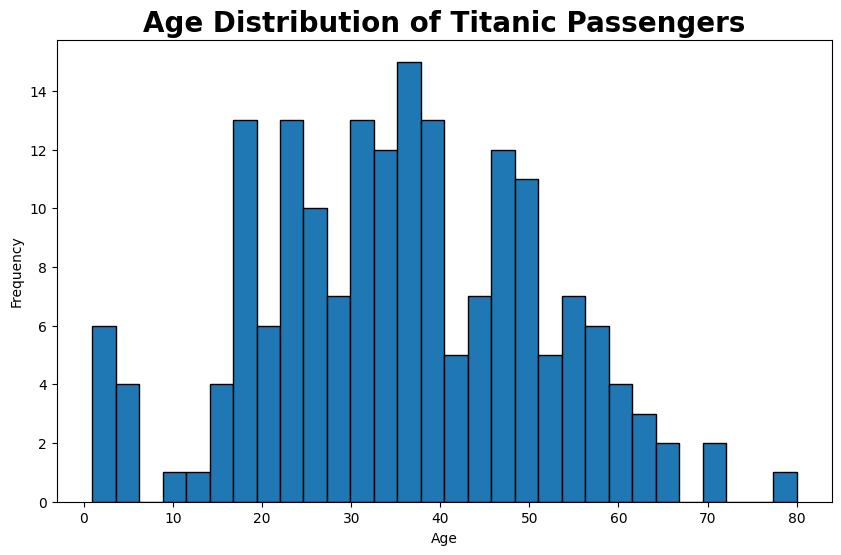

In [14]:
# Histogram for the "Age" column:

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Titanic Passengers',fontsize=20,fontweight=900)
plt.show()

# Boxplot of 'Age' by 'Pclass'

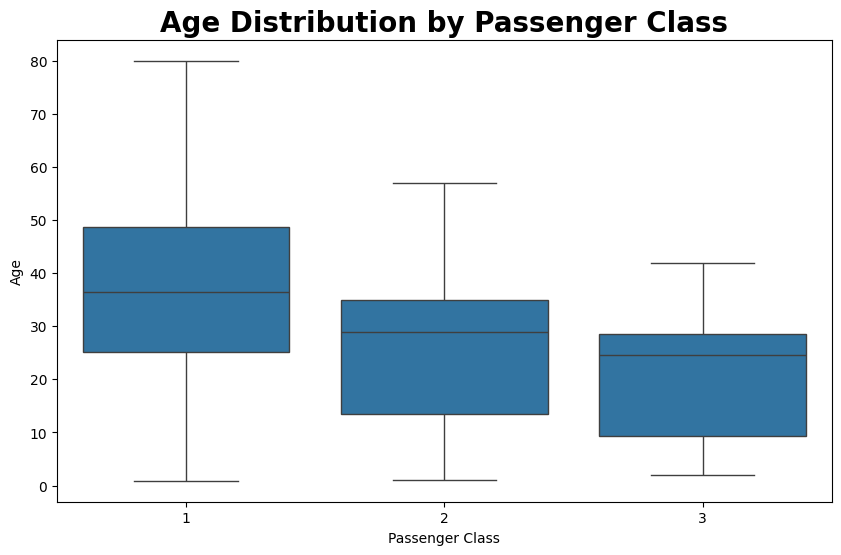

In [15]:
# Boxplot of 'Age' by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class',fontsize=20,fontweight=900)
plt.show()

# Boxplot of Age by 'Survived'

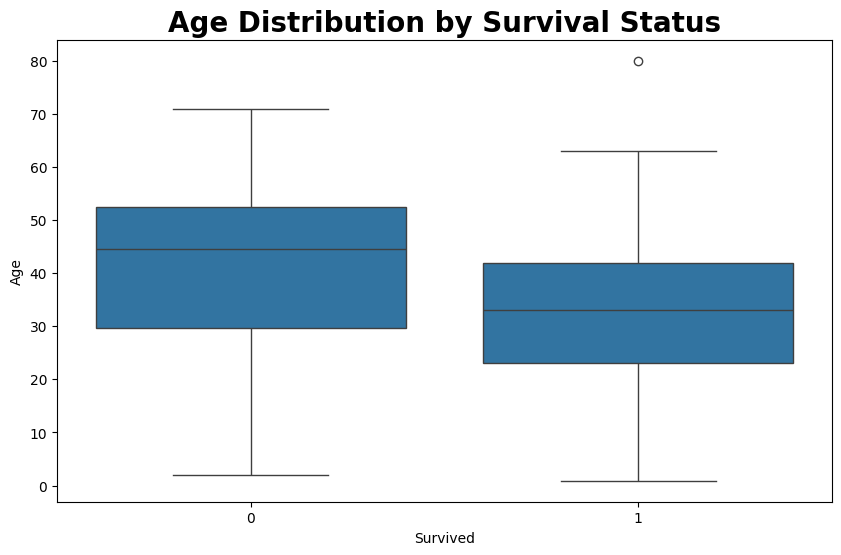

In [16]:
# Boxplot of Age by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution by Survival Status',fontsize=20,fontweight=900)
plt.show()

# Check the data types of all columns

In [17]:
# Check the data types of all columns
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Convert categorical columns to numeric (if appropriate)
# Example: i am converting gender to numeric

In [18]:
# Convert categorical columns to numeric (if appropriate)
# Example: i am converting gender to numeric
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})


# Select only numeric columns

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])


# Compute the correlation matrix


In [20]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation of 'Age' with other features
print(correlation_matrix['Age'])


PassengerId    0.030933
Survived      -0.254085
Pclass        -0.306514
Sex            0.184969
Age            1.000000
SibSp         -0.156162
Parch         -0.271271
Fare          -0.092424
Name: Age, dtype: float64


# Check for missing values in numeric columns

In [21]:
# Check for missing values in numeric columns
print(numeric_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


# Optionally, fill missing values or drop them


In [22]:
# Optionally, fill missing values or drop them
numeric_df = numeric_df.fillna(numeric_df.mean())  # Fill missing values with the mean
# OR
# numeric_df = numeric_df.dropna()  # Drop rows with missing values

# Compute the correlation matrix again
# Display the correlation of 'Age' with other features

In [23]:
# Compute the correlation matrix again
correlation_matrix = numeric_df.corr()

# Display the correlation of 'Age' with other features
print(correlation_matrix['Age'])


PassengerId    0.030933
Survived      -0.254085
Pclass        -0.306514
Sex            0.184969
Age            1.000000
SibSp         -0.156162
Parch         -0.271271
Fare          -0.092424
Name: Age, dtype: float64


# Plot a heatmap of the correlation matrix

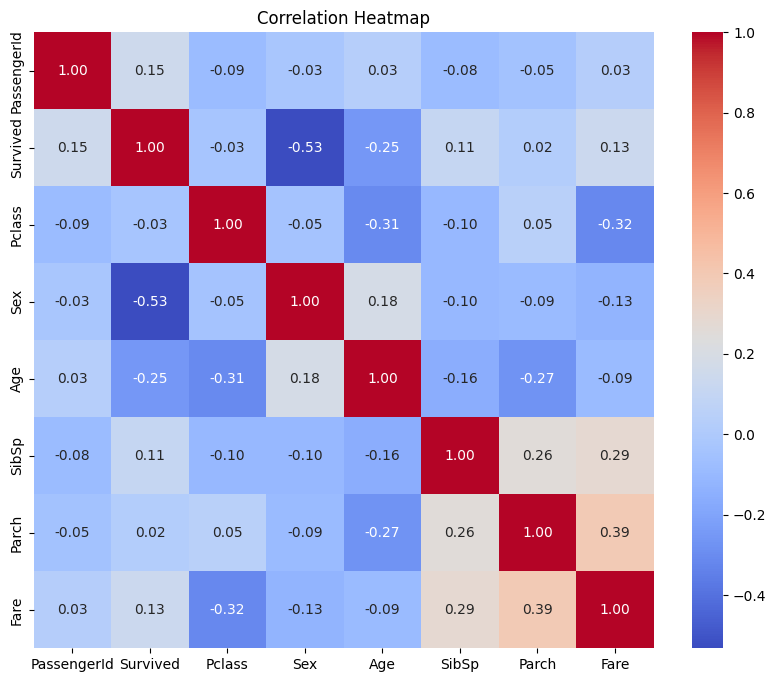

In [24]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Plot survival rate by age group


<ipython-input-25-7de2a3a2240c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
0-12     0.818182
13-18    0.916667
19-30    0.717391
31-50    0.658537
51-80    0.500000
Name: Survived, dtype: float64


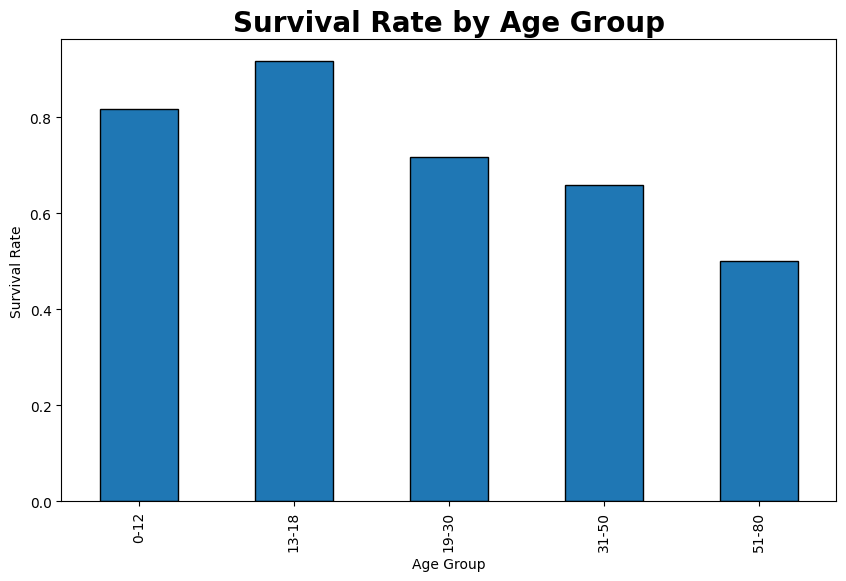

In [25]:
# Define age groups
bins = [0, 12, 18, 30, 50, 80]
labels = ['0-12', '13-18', '19-30', '31-50', '51-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate survival rate by age group
survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
print(survival_rate_by_age_group)

# Plot survival rate by age group
plt.figure(figsize=(10, 6))
survival_rate_by_age_group.plot(kind='bar', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group',fontsize=20,fontweight=900)
plt.show()


# Plot survival rate by passenger class and gender

Pclass  Sex
1       0      0.959459
        1      0.416667
2       0      0.888889
        1      0.666667
3       0      0.600000
        1      0.400000
Name: Survived, dtype: float64


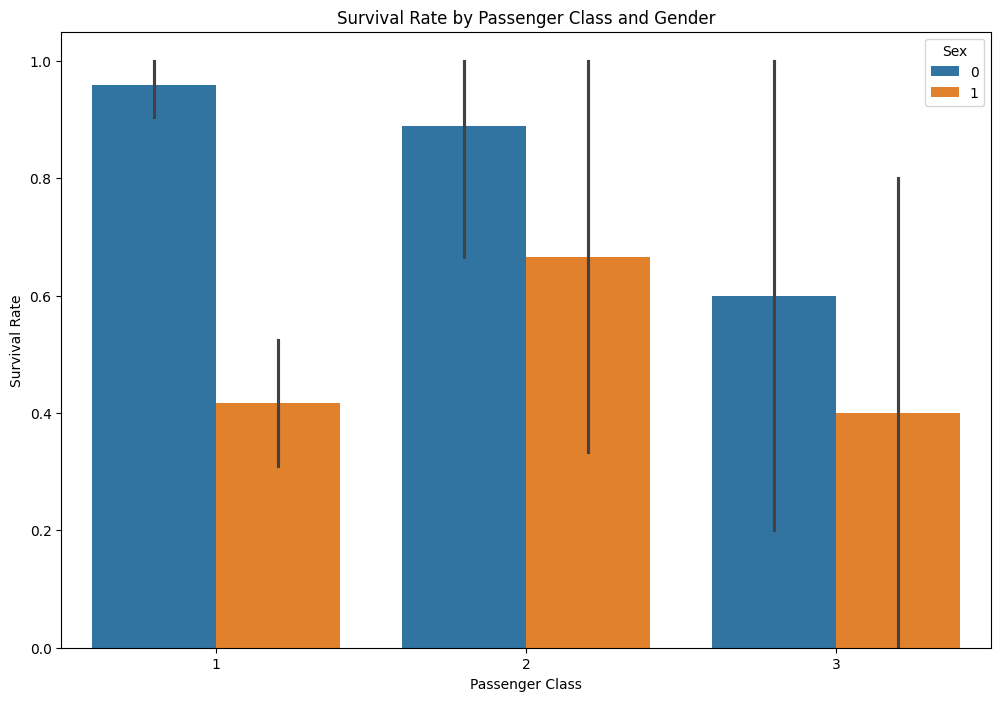

In [26]:
# Survival rate by passenger class and gender
survival_rate_by_class_gender = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print(survival_rate_by_class_gender)

# Plot survival rate by passenger class and gender
plt.figure(figsize=(12, 8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()
